In this tutorial, we want to get a chart on time taken for a train from point A to point B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


First we load a csv from MOT Malaysia

In [2]:
df = pd.read_csv("jadual-perjalanan-train-ets-padang-besar---gemas.csv")

Lets see what is the top 10 rows

In [3]:
df.head(10)


,STESEN,ES9051,EG9053,EG9121,EP9103,EG9025,EG9321,EG9221,EG9027,EG9029,EP9201,EG9031,EP9203,EP9105,EG9035,EG9037,EP9205,EG9425,EG9123
0,PADANG BESAR,NaN,NaN,NaN,NaN,NaN,NaN,7:47,NaN,NaN,11:15,NaN,14:20,NaN,NaN,NaN,17:13,18:05,NaN
1,ARAU,NaN,NaN,NaN,NaN,NaN,NaN,8:06,NaN,NaN,11:34,NaN,14:39,NaN,NaN,NaN,17:32,18:24,NaN
2,ANAK BUKIT,NaN,NaN,NaN,NaN,NaN,NaN,8:22,NaN,NaN,-,NaN,-,NaN,NaN,NaN,-,18:40,NaN
3,ALOR SETAR,NaN,NaN,NaN,NaN,NaN,NaN,8:29,NaN,NaN,11:55,NaN,15:03,NaN,NaN,NaN,17:54,18:47,NaN
4,GURUN,NaN,NaN,NaN,NaN,NaN,NaN,8:46,NaN,NaN,-,NaN,-,NaN,NaN,NaN,-,19:05,NaN
5,SUNGAI PETANI,NaN,NaN,NaN,NaN,NaN,NaN,8:59,NaN,NaN,12:24,NaN,15:33,NaN,NaN,NaN,18:23,19:18,NaN
6,TASEK GELUGOR,NaN,NaN,NaN,NaN,NaN,NaN,9:08,NaN,NaN,-,NaN,-,NaN,NaN,NaN,-,19:28,NaN
7,BUTTERWORTH,NaN,NaN,4:58,6:13,NaN,7:25,-,NaN,NaN,-,NaN,-,16:23,NaN,NaN,-,-,19:45
8,BUKIT MERTAJAM,NaN,NaN,5:09,6:24,NaN,7:36,-,NaN,NaN,-,NaN,-,16:34,NaN,NaN,-,-,19:56
9,PARIT BUNTAR,NaN,NaN,5:25,6:40,NaN,7:52,9:32,NaN,NaN,-,NaN,-,16:50,NaN,NaN,18:55,19:52,20:12


Lets see how many row and column 

In [4]:
df.shape

(36, 19)

lets see the types of the data we have

In [5]:
df.dtypes

STESEN    object
ES9051    object
EG9053    object
EG9121    object
EP9103    object
EG9025    object
EG9321    object
EG9221    object
EG9027    object
EG9029    object
EP9201    object
EG9031    object
EP9203    object
EP9105    object
EG9035    object
EG9037    object
EP9205    object
EG9425    object
EG9123    object
dtype: object

Their are object, but what are they really?

In [6]:
type(df['STESEN'][0])

str

In [7]:
type(df['EG9123'][0])

float

Does all the row of this column is float?

In [8]:
for col in df['EG9123']:
    print(type(col))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


Let us experiment with date time

In [9]:
from datetime import datetime
time = datetime.strptime('23:22', "%H:%M")
print ("the time is %s:%s" % (time.hour, time.minute))

the time is 23:22


Let us try parsing the string to time

In [10]:
from datetime import datetime
for col in df['EG9123']:
    if type(col) == str:
        time = datetime.strptime(col, "%H:%M")
        print ("the time is %s:%s" % (time.hour, time.minute))
    else:
        print (col)

nan
nan
nan
nan
nan
nan
nan
the time is 19:45
the time is 19:56
the time is 20:12


ValueError: time data '-' does not match format '%H:%M'

We see error how to handle?

In [11]:
from datetime import datetime
for col in df['EG9123']:
    if type(col) == str:
        try:
            time = datetime.strptime(col, "%H:%M")
            print ("the time is %s:%s" % (time.hour, time.minute))
        except ValueError:
            print ("Error parsing %s" % (col))
    else:
        print (col)

nan
nan
nan
nan
nan
nan
nan
the time is 19:45
the time is 19:56
the time is 20:12
Error parsing -
the time is 20:41
Error parsing -
the time is 21:0
Error parsing -
the time is 21:31
the time is 21:44
the time is 21:55
the time is 22:5
Error parsing -
Error parsing -
Error parsing -
the time is 22:43
Error parsing -
Error parsing -
Error parsing -
Error parsing -
Error parsing -
the time is 0:8
the time is 0:13
nan
nan
nan
nan
nan
nan


OK, now we want to create a dataframe for our object
Lets conceptualize what we plan to do.

In [12]:
sample_data = {"train": {"city1": 1, "city2": 2.3},
       "train2": {"city1": 2, "city2": 3.4}}
sample_data_frame = pd.DataFrame(sample_data)
print(sample_data_frame)

       train  train2
city1    1.0     2.0
city2    2.3     3.4


In [13]:
sample_chart_data = sample_data_frame["train"]

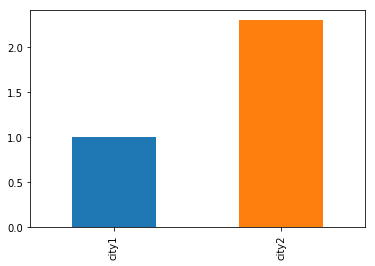

In [14]:
sample_chart_data.plot(kind='bar')

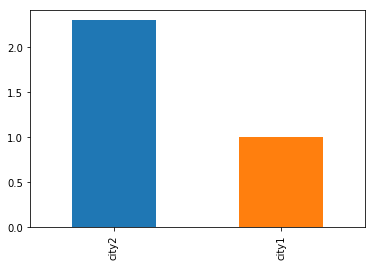

In [15]:
sample_chart_data = sample_chart_data.sort_values(ascending=False)
sample_chart_data.plot(kind='bar')

Now lets try to convert information that we get from csv to distance chart

1. Changing schedule data to time taken data

In [16]:
# sample time substraction methods, then you will get (minutes, seconds)
a = datetime.now()
b = datetime.now()
c = b - a
divmod(c.days * 86400 + c.seconds, 60)

from datetime import timedelta
def timeDifference(starting, ending):
    if ending < starting:
        ending += timedelta(days=1)
    td = ending - starting
    return td.seconds/60
    #return (td.seconds//3600, (td.seconds//60)%60)

In [17]:
starting_time = None
train_time_taken_data = {"EG9123": {}}
row_index = 0

for col in df['EG9123']:
    if type(col) == str:
        try:
            time = datetime.strptime(col, "%H:%M")
            #print ("the time is %s:%s" % (time.hour, time.minute))
            if starting_time == None:
                # This is the first station
                starting_time = time
                train_time_taken_data["EG9123"].update({df['STESEN'][row_index]: 0})
            else:
                train_time_taken_data["EG9123"].update({df['STESEN'][row_index]: timeDifference(starting_time, time)})
        except ValueError:
            #print ("Error parsing %s" % (col))
            continue

    row_index+=1
    
print(train_time_taken_data)

{'EG9123': {'BUTTERWORTH': 0, 'BUKIT MERTAJAM': 11.0, 'PARIT BUNTAR': 27.0, 'BAGAN SERAI': 56.0, 'TAIPING': 75.0, 'PADANG RENGAS': 106.0, 'KUALA KANGSAR': 119.0, 'SUNGAI SIPUT': 130.0, 'IPOH': 140.0, 'BATU GAJAH': 178.0, 'KAMPAR': 263.0, 'TAPAH ROAD': 268.0}}


2. Make them into data frame

In [29]:
train_time_taken_data_frame = pd.DataFrame(train_time_taken_data)
sorted_data = train_time_taken_data_frame.sort_values('EG9123')
print(sorted_data)

                EG9123
BUTTERWORTH        0.0
BUKIT MERTAJAM    11.0
PARIT BUNTAR      27.0
BAGAN SERAI       56.0
TAIPING           75.0
PADANG RENGAS    106.0
KUALA KANGSAR    119.0
SUNGAI SIPUT     130.0
IPOH             140.0
BATU GAJAH       178.0
KAMPAR           263.0
TAPAH ROAD       268.0


3. plot them out

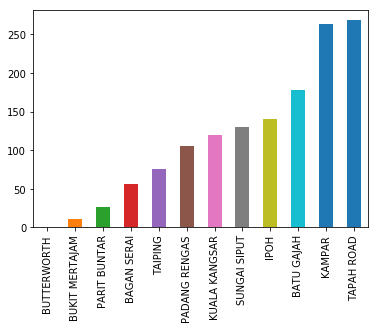

In [40]:
chart_data = sorted_data['EG9123']
chart_data.plot(x=df['STESEN'], kind='bar')